In [1]:
#pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read Data

In [3]:
df=pd.read_csv('TATAMOTORS1.csv',parse_dates=True)

In [4]:
print('Shape of data',df.shape)

Shape of data (823, 13)


In [5]:
df.head(5)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-2018,431.85,430.95,436.40,422.25,424.50,424.45,430.49,6807536,2.930000e+14,58464,2227737,0.3272
1,02-01-2018,424.45,428.85,440.85,422.00,438.20,439.30,433.41,15331261,6.640000e+14,139880,5488117,0.3580
2,03-01-2018,439.30,440.40,441.40,431.95,433.45,433.90,435.06,9794953,4.260000e+14,89076,4383694,0.4475
3,04-01-2018,433.90,430.00,433.30,425.75,430.00,429.95,429.56,8395377,3.610000e+14,79502,2826424,0.3367
4,05-01-2018,429.95,431.25,436.35,429.80,430.35,431.60,432.92,7021611,3.040000e+14,69031,2962590,0.4219


In [6]:
df.tail(5)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
818,26-04-2021,294.0,297.0,299.0,294.60,295.85,295.40,296.48,30583139,9.070000e+14,173282,3291167,0.1076
819,27-04-2021,295.4,295.7,302.5,295.10,302.10,301.50,299.05,35040532,1.050000e+15,191627,5215100,0.1488
820,28-04-2021,301.5,303.5,309.5,303.00,305.15,305.90,307.22,44668126,1.370000e+15,264159,5116568,0.1145
821,29-04-2021,305.9,308.9,310.0,301.25,302.20,301.90,304.77,36647292,1.120000e+15,186996,4193346,0.1144
822,30-04-2021,301.9,298.2,301.3,292.55,293.10,293.85,297.01,36121668,1.070000e+15,227806,7898988,0.2187


In [7]:
df=df.dropna()

In [8]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,8.230000e+02,8.230000e+02,8.230000e+02,8.230000e+02,823.000000
mean,202.459842,202.900243,206.494775,198.790401,202.306015,202.292163,202.676282,4.278798e+07,7.806897e+14,1.925559e+05,6.558579e+06,0.210487
std,87.067606,87.188298,87.943330,86.049558,86.721328,86.757629,86.972193,4.144429e+07,9.606996e+14,1.520572e+05,4.943181e+06,0.122187
min,65.300000,66.500000,66.900000,63.500000,65.450000,65.300000,65.500000,3.820313e+06,7.660000e+13,3.904400e+04,1.012065e+06,0.038500
25%,137.600000,138.625000,141.775000,134.800000,137.725000,137.600000,138.245000,1.422333e+07,2.960000e+14,9.929050e+04,3.222708e+06,0.119650
50%,176.800000,177.500000,181.150000,174.650000,176.800000,176.800000,177.760000,3.129667e+07,4.870000e+14,1.471860e+05,5.113467e+06,0.170600
75%,266.600000,267.525000,271.250000,260.800000,266.325000,266.600000,266.875000,5.814877e+07,8.690000e+14,2.320795e+05,8.136768e+06,0.286100
max,439.300000,440.400000,443.500000,433.000000,438.200000,439.300000,438.960000,3.905778e+08,9.370000e+15,1.318669e+06,3.314961e+07,0.700700


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                823 non-null    object 
 1   Prev Close          823 non-null    float64
 2   Open                823 non-null    float64
 3   High                823 non-null    float64
 4   Low                 823 non-null    float64
 5   Last                823 non-null    float64
 6   Close               823 non-null    float64
 7   VWAP                823 non-null    float64
 8   Volume              823 non-null    int64  
 9   Turnover            823 non-null    float64
 10  Trades              823 non-null    int64  
 11  Deliverable Volume  823 non-null    int64  
 12  %Deliverble         823 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 83.7+ KB


In [10]:
df.isnull().sum()

Date                  0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [12]:
#df["Date"]=pd.to_datetime(df["Date"])
import datetime
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                823 non-null    datetime64[ns]
 1   Prev Close          823 non-null    float64       
 2   Open                823 non-null    float64       
 3   High                823 non-null    float64       
 4   Low                 823 non-null    float64       
 5   Last                823 non-null    float64       
 6   Close               823 non-null    float64       
 7   VWAP                823 non-null    float64       
 8   Volume              823 non-null    int64         
 9   Turnover            823 non-null    float64       
 10  Trades              823 non-null    int64         
 11  Deliverable Volume  823 non-null    int64         
 12  %Deliverble         823 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory 

In [13]:
df.columns.values

array(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close',
       'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'], dtype=object)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                823 non-null    datetime64[ns]
 1   Prev Close          823 non-null    float64       
 2   Open                823 non-null    float64       
 3   High                823 non-null    float64       
 4   Low                 823 non-null    float64       
 5   Last                823 non-null    float64       
 6   Close               823 non-null    float64       
 7   VWAP                823 non-null    float64       
 8   Volume              823 non-null    int64         
 9   Turnover            823 non-null    float64       
 10  Trades              823 non-null    int64         
 11  Deliverable Volume  823 non-null    int64         
 12  %Deliverble         823 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory 

#Plot Your Data

<AxesSubplot:>

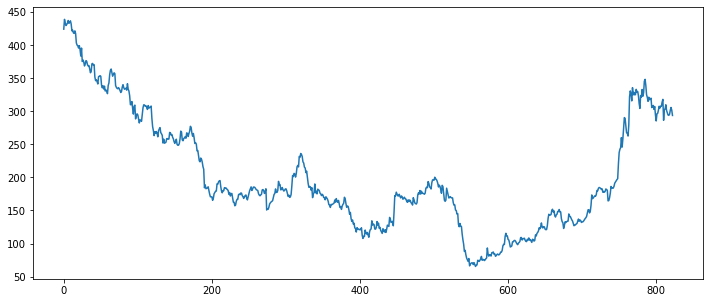

In [16]:
df['Close'].plot(figsize=(12,5))

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


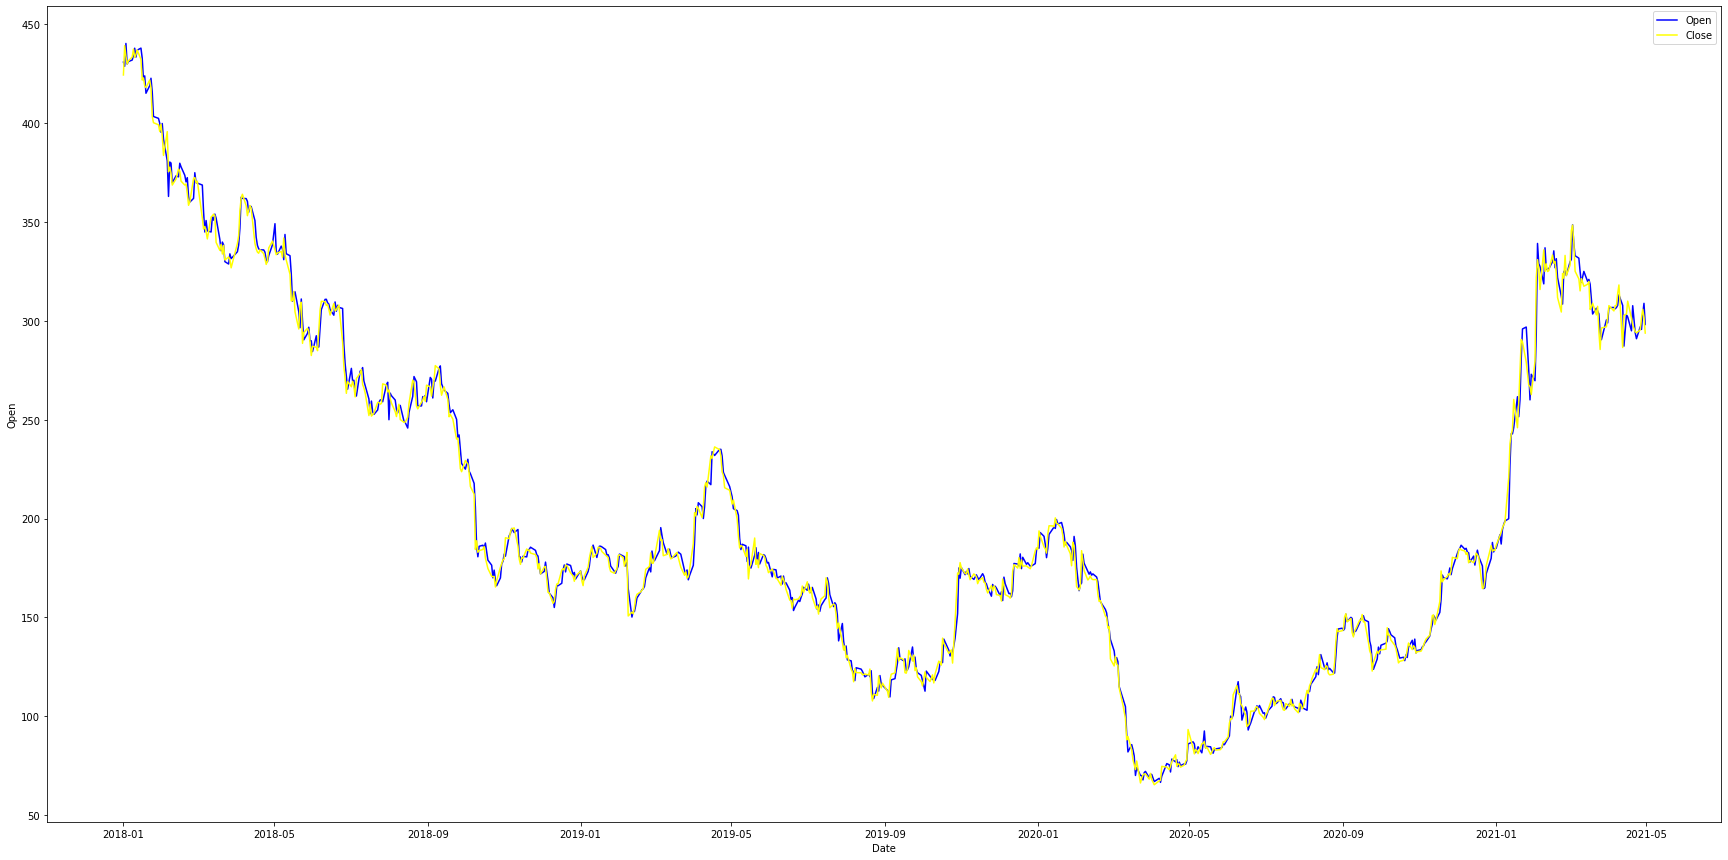

In [17]:
plt.figure(figsize=(30,15))
x=df['Date']
y=df['Open']
z=df['Close']
sns.lineplot(x,y,color='blue',label='Open')
sns.lineplot(x,z,color='yellow',label='Close')
plt.legend()
plt.show()

<AxesSubplot:>

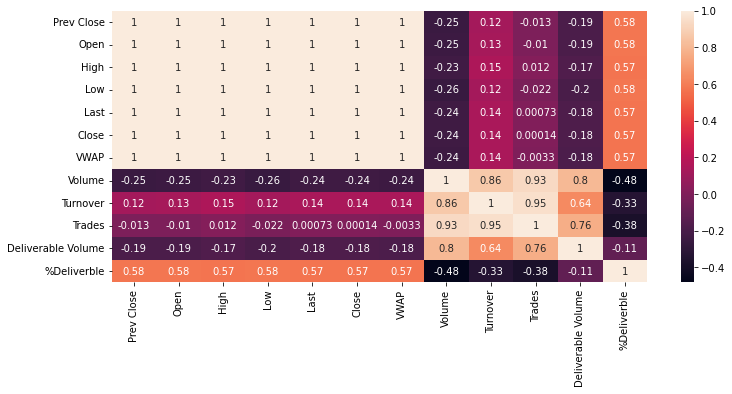

In [18]:
plt.figure(figsize=[12,5])
d=df
corr=d.corr() 
sns.heatmap(corr,annot=True)


#Check For Stationarity

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [20]:
adf_test(df['Close'])

1. ADF :  -2.5883838934968084
2. P-Value :  0.09542192576358399
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 821
5. Critical Values :
	 1% :  -3.438340089700066
	 5% :  -2.8650668167215243
	 10% :  -2.568647979826153


#Figure Out Order for ARIMA Model

In [21]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [22]:
stepwise_fit = auto_arima(df['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  823
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -2712.756
Date:                Sat, 19 Nov 2022   AIC                           5437.512
Time:                        08:23:12   BIC                           5465.775
Sample:                             0   HQIC                          5448.356
                                - 823                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7966      0.024    -32.971      0.000      -0.844      -0.749
ar.L2         -0.6381      0.035    -18.052      0.000      -0.707      -0.569
ar.L3         -0.5060      0.036    -14.191      0.000      -0.576      -0.436
ar.L4         -0.3784      0.035    -10.871      0.000      -0.447      -0.310
ar.L5         -0.2238      0.031     -7.282      0.000      -0.284      -0.164
sigma2        43.3466      1.221     35.498      0.000      40.953      45.740
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):               797.72
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.03
Prob(H) (two-sided):                  0.23   Kurtosis:                         7.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Close'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5847.326, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=5636.144, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=5556.405, Time=0.21 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=5512.225, Time=0.36 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=5477.405, Time=0.40 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=5437.512, Time=0.46 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=1.38 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.96 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=5439.506, Time=0.60 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 5.599 seconds


In [24]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [45]:
print(df.shape)
train=df.iloc[:31]
test=df.iloc[31:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(823, 13)
(31, 13) (792, 13)
Date                  2018-02-15 00:00:00
Prev Close                         376.85
Open                                379.8
High                                382.2
Low                                 373.1
Last                                375.9
Close                               375.8
VWAP                               379.06
Volume                           10225880
Turnover                388000000000000.0
Trades                              90362
Deliverable Volume                4999054
%Deliverble                        0.4889
Name: 31, dtype: object Date                  2021-04-30 00:00:00
Prev Close                          301.9
Open                                298.2
High                                301.3
Low                                292.55
Last                                293.1
Close                              293.85
VWAP                               297.01
Volume                           36121668
Turnover               

## Train the Model

In [46]:

import statsmodels.api as sm
mod = sm.tsa.arima.ARIMA(df.Close,order=(5,2,0))
model = mod.fit()
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  823
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -2712.756
Date:                Sat, 19 Nov 2022   AIC                           5437.512
Time:                        08:36:22   BIC                           5465.775
Sample:                             0   HQIC                          5448.356
                                - 823                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7966      0.024    -32.971      0.000      -0.844      -0.749
ar.L2         -0.6381      0.035    -18.052      0.000      -0.707      -0.569
ar.L3         -0.5060      0.036    -14.191      0.0

#Make Predictions on Test Set

<AxesSubplot:>

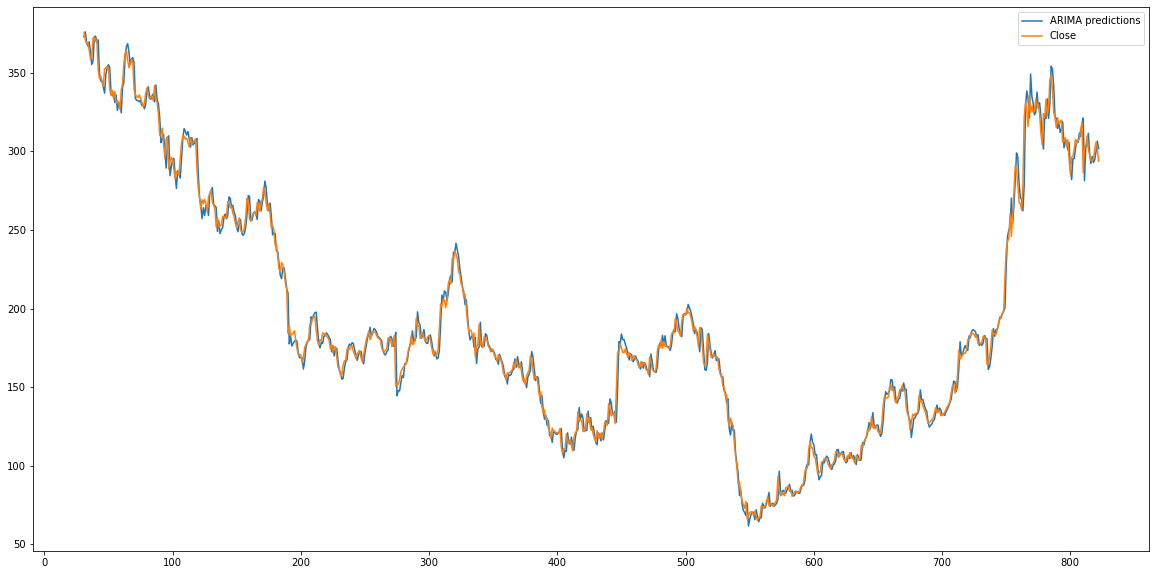

In [47]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
fig=plt.figure(figsize=[20,10])
pred.plot(legend=True)
test['Close'].plot(legend=True)


<AxesSubplot:>

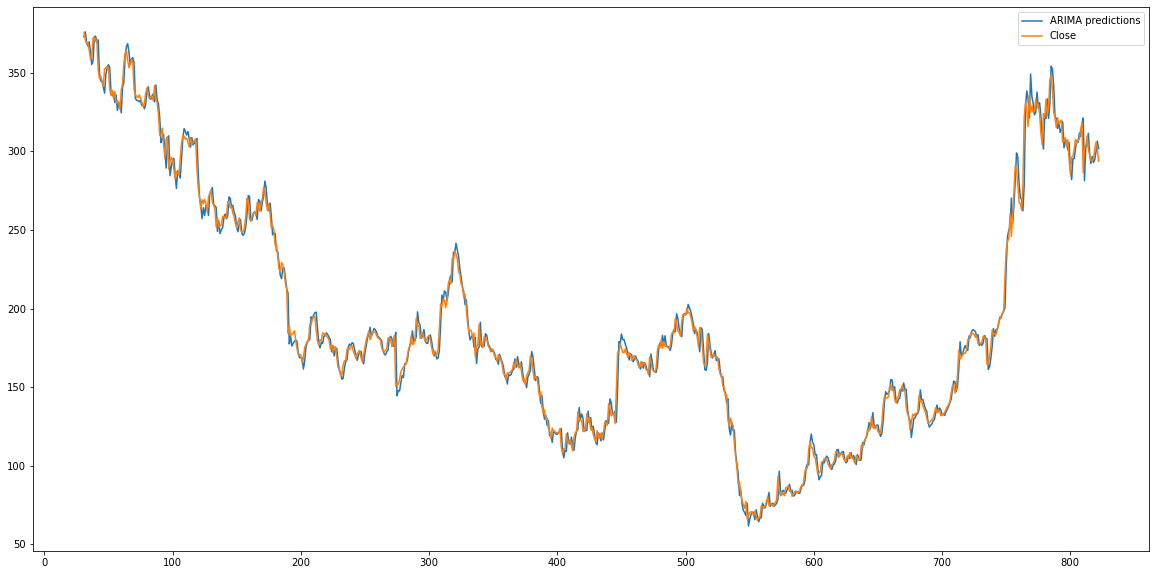

In [48]:
fig=plt.figure(figsize=[20,10])
pred.plot(legend='ARIMA Predictions')
test['Close'].plot(legend=True)

In [49]:
test['Close'].mean()

194.1662878787877

In [50]:
from sklearn import metrics
import math
error_score=metrics.r2_score(pred,test["Close"])
print("R2 Score :",error_score)
mse=metrics.mean_squared_error(pred,test["Close"])
print("Mean Square Error:",mse)
rmse=math.sqrt(mse)
print("Root Mean Square Error:",rmse)
                    

R2 Score : 0.9929469889368788
Mean Square Error: 42.932169030757194
Root Mean Square Error: 6.552264420088463


#For Future Dates

In [51]:
index_future_dates=pd.date_range(start='2021-04-30',end='2021-05-30')
#print(index_future_dates)
pred=model.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-04-30    293.031511
2021-05-01    292.878552
2021-05-02    293.189799
2021-05-03    292.459548
2021-05-04    290.095590
2021-05-05    287.592768
2021-05-06    286.445432
2021-05-07    285.423826
2021-05-08    284.358725
2021-05-09    282.980256
2021-05-10    281.333666
2021-05-11    279.771747
2021-05-12    278.460356
2021-05-13    277.159355
2021-05-14    275.818962
2021-05-15    274.404500
2021-05-16    272.955167
2021-05-17    271.540818
2021-05-18    270.170913
2021-05-19    268.797770
2021-05-20    267.410915
2021-05-21    266.009124
2021-05-22    264.604972
2021-05-23    263.210450
2021-05-24    261.823235
2021-05-25    260.433969
2021-05-26    259.041037
2021-05-27    257.645521
2021-05-28    256.250520
2021-05-29    254.857754
2021-05-30    253.466033
Freq: D, Name: ARIMA Predictions, dtype: float64


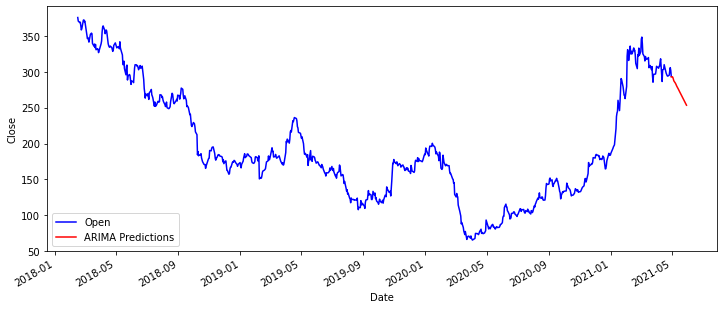

In [52]:
plt.figure(figsize=(30,15))
x=df['Date']
y=test['Close']
z=pred
sns.lineplot(x,y,color='blue',label='Open')

plt.legend()

pred.plot(figsize=(12,5),legend=True,color='red')
plt.show()